In [25]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [26]:
houses = pd.read_csv('../datasets/train.csv')
#test = pd.read_csv('datasets/test.csv')
#sample_sub_reg = pd.read_csv('datasets/sample_sub_reg.csv')

In [27]:
houses.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [29]:
houses['Garage Area'].describe()

count    2050.000000
mean      473.671707
std       215.934561
min         0.000000
25%       319.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: Garage Area, dtype: float64

## a simple strategy may be to see the non-missing, and non catagorical, columns and build a model without the suplementary information
### lets try linear regression with numeric columns

In [4]:
houses.columns =houses.columns.str.lower().str.replace(' ','_')
X= houses[['overall_qual','overall_cond']]
y= houses.saleprice

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X,y)

LinearRegression()

In [47]:
lr.score(X,y)

0.6412853172301676

In [7]:
test = pd.read_csv('../datasets/test.csv')

In [8]:
test.columns =test.columns.str.lower().str.replace(' ','_')

In [9]:
y_pred = lr.predict(test[['overall_qual','overall_cond']])

In [10]:
data={'Id': test.id , 'SalePrice': y_pred}

In [11]:
df = pd.DataFrame(data)

In [12]:
df.dtypes

Id             int64
SalePrice    float64
dtype: object

In [13]:
df.to_csv('../datasets/kaggle_sub_1.csv', index=False)

### That is how the value is distributed in the training dataset.
## Next I should analyze the features.
#### Catagorical 
#### Ordinal
#### Rational values (not just int)
#### int columns
#### some will need decoding
#### Some will have massive spreads and some may be between 0 and 1
#### negative values?
#### missing values, nan
## 80 columns will need to be treated with a top down approach. group the types of columns, process the data as needed based on if the set of possible input values is numeric (float, int) catagorical, ordinal, datetime, or something else 

In [14]:
X_numeric_features_list=list(X.describe().columns)

In [15]:
X_numeric= X[X_numeric_features_list]

In [16]:
X_numeric.shape

(2051, 2)

## Before looking at the others, there are currently 38 columns with numeric which may provide quick insights into this daunting challenge

In [17]:
X_numeric.describe()

,overall_qual,overall_cond
count,2051.000000,2051.000000
mean,6.112140,5.562165
std,1.426271,1.104497
min,1.000000,1.000000
25%,5.000000,5.000000
50%,6.000000,5.000000
75%,7.000000,6.000000
max,10.000000,9.000000


In [18]:
features = list(houses.columns)

In [19]:
missing_vals= [(houses[features[i]].isna().mean(),features[i])for i in range(80)]

In [20]:
#X.describe().columns # hopefully this is the numeric columns (others probably are too but need decoding or sometihng)

In [21]:
missing_vals= [(houses[features[i]].isna().mean(),features[i])for i in range(80)]

In [22]:
missing_vals.sort(key=lambda pair: pair[0], reverse= True)
missing_vals

[(0.9956118966357874, 'pool_qc'),
 (0.9683081423695759, 'misc_feature'),
 (0.931740614334471, 'alley'),
 (0.8049731838127743, 'fence'),
 (0.48756704046806437, 'fireplace_qu'),
 (0.16089712335446124, 'lot_frontage'),
 (0.05558264261335934, 'garage_yr_blt'),
 (0.05558264261335934, 'garage_finish'),
 (0.05558264261335934, 'garage_qual'),
 (0.05558264261335934, 'garage_cond'),
 (0.05509507557289127, 'garage_type'),
 (0.028278888347147733, 'bsmt_exposure'),
 (0.027303754266211604, 'bsmtfin_type_2'),
 (0.02681618722574354, 'bsmt_qual'),
 (0.02681618722574354, 'bsmt_cond'),
 (0.02681618722574354, 'bsmtfin_type_1'),
 (0.010726474890297415, 'mas_vnr_type'),
 (0.010726474890297415, 'mas_vnr_area'),
 (0.0009751340809361287, 'bsmt_full_bath'),
 (0.0009751340809361287, 'bsmt_half_bath'),
 (0.00048756704046806434, 'bsmtfin_sf_1'),
 (0.00048756704046806434, 'bsmtfin_sf_2'),
 (0.00048756704046806434, 'bsmt_unf_sf'),
 (0.00048756704046806434, 'total_bsmt_sf'),
 (0.00048756704046806434, 'garage_cars'),


#### We have found the percent of missing values by column and stored that as a list of tuples and sorted the list by percent missing values

In [30]:
np.median(y)

162500.0

In [38]:
houses['Garage Area'].describe()

count    2050.000000
mean      473.671707
std       215.934561
min         0.000000
25%       319.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: Garage Area, dtype: float64

In [41]:
np.round(houses['Garage Type'].value_counts(normalize=True),2)

Attchd     0.63
Detchd     0.28
BuiltIn    0.07
Basment    0.01
2Types     0.01
CarPort    0.01
Name: Garage Type, dtype: float64

In [45]:
np.round(houses['MS Zoning'].value_counts(normalize=True),2)

RL         0.78
RM         0.15
FV         0.05
C (all)    0.01
RH         0.01
A (agr)    0.00
I (all)    0.00
Name: MS Zoning, dtype: float64

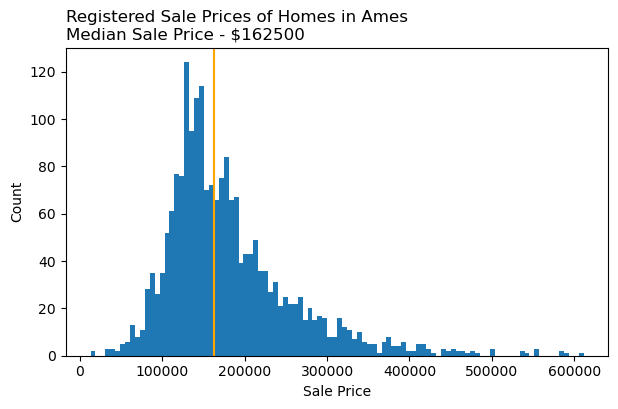

In [36]:
plt.figure(figsize=(7,4))
plt.hist(y, bins = 100)
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.axvline(np.median(y), color='orange')
plt.title('Registered Sale Prices of Homes in Ames \n'+ 
          'Median Sale Price - $162500',loc= 'left')
plt.savefig('../images/price_hist.png');

# Below are the missing columns

## many missing values should be changed to a zero. The quality of a pool/fireplace, is meaningless if not present. I need to be careful with how I replace the missings case by case

In [24]:
missing_vals.sort(key=lambda pair: pair[0], reverse= True)
missing_vals

[(0.9956118966357874, 'pool_qc'),
 (0.9683081423695759, 'misc_feature'),
 (0.931740614334471, 'alley'),
 (0.8049731838127743, 'fence'),
 (0.48756704046806437, 'fireplace_qu'),
 (0.16089712335446124, 'lot_frontage'),
 (0.05558264261335934, 'garage_yr_blt'),
 (0.05558264261335934, 'garage_finish'),
 (0.05558264261335934, 'garage_qual'),
 (0.05558264261335934, 'garage_cond'),
 (0.05509507557289127, 'garage_type'),
 (0.028278888347147733, 'bsmt_exposure'),
 (0.027303754266211604, 'bsmtfin_type_2'),
 (0.02681618722574354, 'bsmt_qual'),
 (0.02681618722574354, 'bsmt_cond'),
 (0.02681618722574354, 'bsmtfin_type_1'),
 (0.010726474890297415, 'mas_vnr_type'),
 (0.010726474890297415, 'mas_vnr_area'),
 (0.0009751340809361287, 'bsmt_full_bath'),
 (0.0009751340809361287, 'bsmt_half_bath'),
 (0.00048756704046806434, 'bsmtfin_sf_1'),
 (0.00048756704046806434, 'bsmtfin_sf_2'),
 (0.00048756704046806434, 'bsmt_unf_sf'),
 (0.00048756704046806434, 'total_bsmt_sf'),
 (0.00048756704046806434, 'garage_cars'),
